In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *  
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding
from IPython.display import display 
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
data_train = pd.read_csv('/home/spriyanshu723/hack/Dataset/final_train.csv')
data_train.head()

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,...,Grade 2,0.0,0,0,0,0,0,0,0,1.0
1,1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0
3,3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,...,Grade 4,0.0,0,0,0,0,0,0,0,1.0
4,4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,...,Grade 3,0.0,0,0,0,0,0,0,0,1.0


In [4]:
data_train.columns

Index(['Unnamed: 0', 'building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_supe

In [5]:
data_train = data_train.drop(['Unnamed: 0'], axis=1)
data_train = data_train.drop(['building_id'], axis=1)

In [6]:
data_train.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'ha

In [7]:
data_train.shape

(631761, 52)

In [8]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)

# Categorical Values and One hot Encoding

In [9]:
train_cats(data_train)

In [10]:
df, y, nas = proc_df(data_train, 'damage_grade', max_n_cat=7)

In [11]:
df.head()

,district_id,vdcmun_id,ward_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,...,position_Attached-2 side,position_Attached-3 side,position_Not attached,position_nan,area_assesed_Both,area_assesed_Building removed,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect,area_assesed_nan
205877,20,2017,201709,1.0,0.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
470494,29,2904,290407,1.0,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
191599,12,1245,124503,1.0,0.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
302238,22,2242,224208,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79396,40,4022,402211,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
y

array([0, 4, 2, ..., 3, 1, 4], dtype=int8)

In [13]:
nas

{'count_families': 1.0, 'has_repair_started': 0.0}

In [14]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'plan_configuration',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',

In [15]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 131761
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data_train, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((500000, 86), (500000,), (131761, 86), (131761,))

In [16]:
df.shape

(631761, 86)

In [17]:
a = RandomForestClassifier(n_jobs=-1, n_estimators=150, oob_score=True)
%time a.fit(X_train, y_train)
a.score(X_valid, y_valid)

CPU times: user 8min 1s, sys: 56.5 s, total: 8min 57s
Wall time: 1min 40s


0.7637388908705914

In [18]:
a.oob_score_

0.761532

In [19]:
b = RandomForestClassifier(n_jobs=-1, n_estimators=200, oob_score=True)
%time b.fit(X_train, y_train)
b.score(X_valid, y_valid)

CPU times: user 9min 45s, sys: 1min 13s, total: 10min 58s
Wall time: 2min


0.7638603228572947

In [20]:
b.oob_score_

0.761658

# Feature Importance

In [21]:
fi = rf_feat_importance(b, df)

In [22]:
fi[:30]

,cols,imp
20,height_ft_post_eq,0.140547
33,condition_post_eq,0.109845
16,count_floors_post_eq,0.097608
2,ward_id,0.077251
18,plinth_area_sq_ft,0.071008
17,age_building,0.068482
1,vdcmun_id,0.056083
80,area_assesed_Both,0.054977
81,area_assesed_Building removed,0.040016
44,has_repair_started_na,0.035421


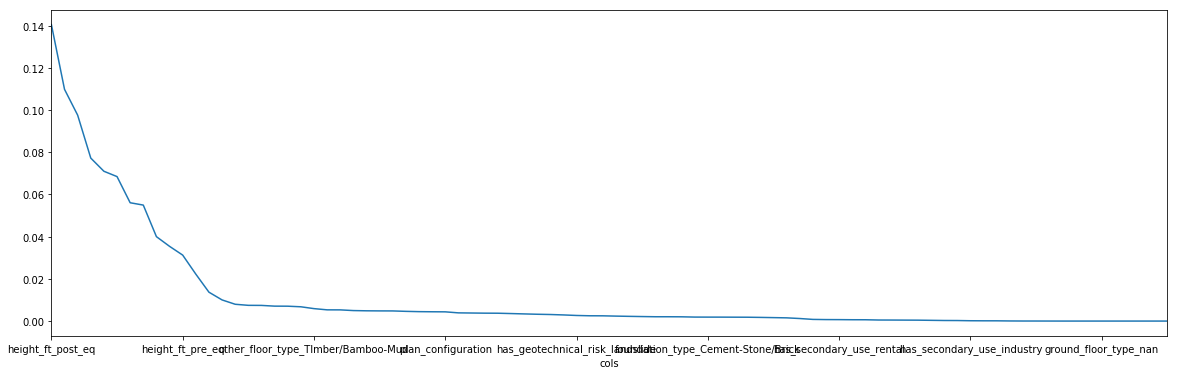

In [23]:
fi.plot('cols', 'imp', figsize=(20,6), legend=False)

In [24]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

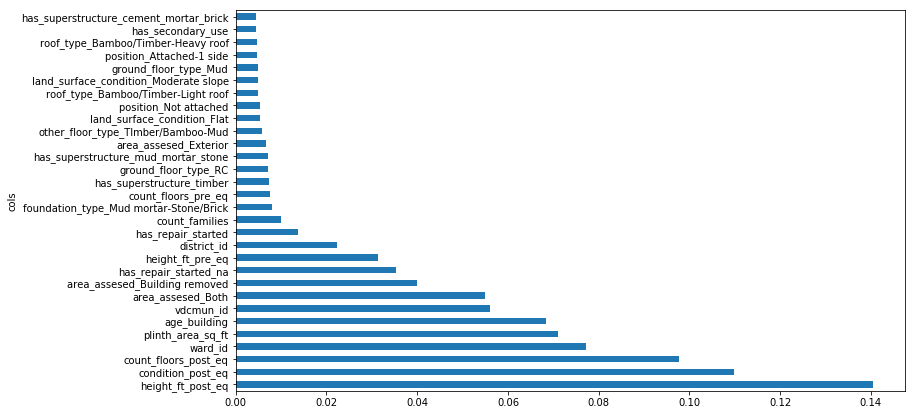

In [25]:
plot_fi(fi[:30]);

In [26]:
keep = fi[fi.imp>0.005].cols
keep

20                         height_ft_post_eq
33                         condition_post_eq
16                      count_floors_post_eq
2                                    ward_id
18                         plinth_area_sq_ft
17                              age_building
1                                  vdcmun_id
80                         area_assesed_Both
81             area_assesed_Building removed
44                     has_repair_started_na
19                          height_ft_pre_eq
0                                district_id
42                        has_repair_started
3                             count_families
56    foundation_type_Mud mortar-Stone/Brick
15                       count_floors_pre_eq
28                 has_superstructure_timber
67                      ground_floor_type_RC
23       has_superstructure_mud_mortar_stone
82                     area_assesed_Exterior
72        other_floor_type_TImber/Bamboo-Mud
50               land_surface_condition_Flat
78        

In [27]:
len(keep)

23

In [28]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'plan_configuration',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',

In [29]:
data_new = df[keep].copy()

In [30]:
data_new.shape

(631761, 23)

In [31]:
data_new.columns

Index(['height_ft_post_eq', 'condition_post_eq', 'count_floors_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'vdcmun_id',
       'area_assesed_Both', 'area_assesed_Building removed',
       'has_repair_started_na', 'height_ft_pre_eq', 'district_id',
       'has_repair_started', 'count_families',
       'foundation_type_Mud mortar-Stone/Brick', 'count_floors_pre_eq',
       'has_superstructure_timber', 'ground_floor_type_RC',
       'has_superstructure_mud_mortar_stone', 'area_assesed_Exterior',
       'other_floor_type_TImber/Bamboo-Mud', 'land_surface_condition_Flat',
       'position_Not attached'],
      dtype='object')

In [32]:
y

array([0, 4, 2, ..., 3, 1, 4], dtype=int8)

In [33]:
len(y)

631761

In [34]:
data_new.to_csv('/home/spriyanshu723/new.csv')

In [36]:
X_train, X_valid = split_vals(data_new, n_trn)

In [37]:
c = RandomForestClassifier(n_jobs=-1, oob_score=True)
%time c.fit(X_train, y_train)
c.score(X_valid, y_valid)

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


CPU times: user 20.3 s, sys: 2.86 s, total: 23.2 s
Wall time: 5.53 s


0.7494630429337968

In [38]:
d = RandomForestClassifier(n_jobs=-1, n_estimators=20, oob_score=True)
%time d.fit(X_train, y_train)
d.score(X_valid, y_valid)

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


CPU times: user 41.2 s, sys: 6.57 s, total: 47.8 s
Wall time: 9.6 s


0.7551475778113402

In [39]:
d.oob_score_

0.739578

In [40]:
e = RandomForestClassifier(n_jobs=-1,n_estimators=40, oob_score=True)
%time e.fit(X_train, y_train)
e.score(X_valid, y_valid)

CPU times: user 1min 22s, sys: 13.7 s, total: 1min 36s
Wall time: 17.4 s


0.7593825183476143

In [41]:
e.oob_score_

0.75114

In [42]:
f = RandomForestClassifier(n_jobs=-1, n_estimators=80, oob_score=True)
%time f.fit(X_train, y_train)
f.score(X_valid, y_valid)

CPU times: user 2min 45s, sys: 27.9 s, total: 3min 13s
Wall time: 33.4 s


0.7614392726223996

In [43]:
f.oob_score_

0.75611

In [44]:
aa = RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score=True)
%time aa.fit(X_train, y_train)
aa.score(X_valid, y_valid)

CPU times: user 3min 31s, sys: 32.8 s, total: 4min 3s
Wall time: 41.9 s


0.7618718740750298

In [45]:
aa.oob_score_

0.757372

# Regression

In [46]:
ab = RandomForestRegressor(n_jobs=-1, n_estimators=20 ,oob_score=True)
%time ab.fit(X_train, y_train)
ab.score(X_valid, y_valid)

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 1min 32s, sys: 324 ms, total: 1min 32s
Wall time: 15.6 s


0.8526117757069722

In [47]:
ab.oob_score_

0.8377009571675634

In [48]:
ac = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
%time ac.fit(X_train, y_train)
ac.score(X_valid, y_valid)

CPU times: user 3min 20s, sys: 505 ms, total: 3min 21s
Wall time: 29.5 s


0.8560496524661124

In [49]:
ac.oob_score_

0.8493030453523849

In [50]:
ad = RandomForestRegressor(n_jobs=-1, n_estimators=80, oob_score=True)
%time ad.fit(X_train, y_train)
ad.score(X_valid, y_valid)

CPU times: user 6min 25s, sys: 880 ms, total: 6min 26s
Wall time: 55.9 s


0.8581038208732236

In [51]:
ad.oob_score_

0.8543670231850412

In [52]:
ae = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
%time ae.fit(X_train, y_train)
ae.score(X_valid, y_valid)

CPU times: user 8min 6s, sys: 1.11 s, total: 8min 7s
Wall time: 1min 10s


0.858285332499915

In [53]:
ae.oob_score_

0.8551811662058002

## Adaboost Classifier 

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
l = AdaBoostClassifier(n_estimators=100)

In [56]:
%time l.fit(X_train, y_train)

CPU times: user 1min 58s, sys: 208 ms, total: 1min 58s
Wall time: 59.5 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [57]:
l.score(X_valid, y_valid)

0.45030016469213197

# Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
X_train.shape

(500000, 23)

In [60]:
X_train.columns

Index(['height_ft_post_eq', 'condition_post_eq', 'count_floors_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'vdcmun_id',
       'area_assesed_Both', 'area_assesed_Building removed',
       'has_repair_started_na', 'height_ft_pre_eq', 'district_id',
       'has_repair_started', 'count_families',
       'foundation_type_Mud mortar-Stone/Brick', 'count_floors_pre_eq',
       'has_superstructure_timber', 'ground_floor_type_RC',
       'has_superstructure_mud_mortar_stone', 'area_assesed_Exterior',
       'other_floor_type_TImber/Bamboo-Mud', 'land_surface_condition_Flat',
       'position_Not attached'],
      dtype='object')

In [61]:
n = GradientBoostingClassifier(n_estimators=100)

In [62]:
%time n.fit(X_train, y_train)

CPU times: user 15min 36s, sys: 611 ms, total: 15min 37s
Wall time: 8min 2s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
n.score(X_valid, y_valid)

0.721746191968792

In [64]:
data_train.shape

(631761, 52)

In [65]:
data_new.shape

(631761, 23)

# XGB Boosting

In [67]:
import xgboost as xgb

In [68]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=150, learning_rate=0.05)

In [69]:
%time gbm.fit(X_train, y_train)

CPU times: user 5min 3s, sys: 488 ms, total: 5min 4s
Wall time: 5min 4s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
gbm.score(X_valid, y_valid)

0.7096029932984722

In [71]:
gbm_one = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05)
%time gbm_one.fit(X_train, y_train)
gbm_one.score(X_valid, y_valid)

CPU times: user 3min 20s, sys: 484 ms, total: 3min 20s
Wall time: 3min 20s


0.7028407495389379

# TOP 8 - Features

In [72]:
keep = fi[fi.imp>0.05].cols
keep

20       height_ft_post_eq
33       condition_post_eq
16    count_floors_post_eq
2                  ward_id
18       plinth_area_sq_ft
17            age_building
1                vdcmun_id
80       area_assesed_Both
Name: cols, dtype: object

In [73]:
len(keep)

8

In [74]:
data_eight = df[keep].copy()
data_eight.head()

,height_ft_post_eq,condition_post_eq,count_floors_post_eq,ward_id,plinth_area_sq_ft,age_building,vdcmun_id,area_assesed_Both
205877,16,8,2,201709,295,20,2017,1
470494,0,6,0,290407,450,16,2904,1
191599,15,3,1,124503,258,15,1245,1
302238,0,6,0,224208,300,14,2242,0
79396,14,7,2,402211,670,30,4022,0


In [75]:
data_eight.columns

Index(['height_ft_post_eq', 'condition_post_eq', 'count_floors_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'vdcmun_id',
       'area_assesed_Both'],
      dtype='object')

In [76]:
data_eight.shape

(631761, 8)

In [77]:
X_train, X_valid = split_vals(data_eight, n_trn)

In [78]:
X_train.shape

(500000, 8)

In [79]:
X_valid.shape

(131761, 8)

# Classifier

In [80]:
ba = RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score=True)
%time ba.fit(X_train, y_train)
ba.score(X_valid, y_valid)

CPU times: user 2min 44s, sys: 36.3 s, total: 3min 21s
Wall time: 34.6 s


0.7413878158180341

In [81]:
ba.oob_score_

0.736384

In [82]:
bc = RandomForestRegressor(n_jobs=-1, n_estimators=100, oob_score=True)
%time bc.fit(X_train, y_train)
bc.score(X_valid, y_valid)

CPU times: user 4min 40s, sys: 1.24 s, total: 4min 41s
Wall time: 43 s


0.8350103671665012

In [84]:
bc.oob_score_

0.8320431843518705

In [85]:
data_eight.columns

Index(['height_ft_post_eq', 'condition_post_eq', 'count_floors_post_eq',
       'ward_id', 'plinth_area_sq_ft', 'age_building', 'vdcmun_id',
       'area_assesed_Both'],
      dtype='object')

In [88]:
data_train.height_ft_post_eq.unique()

array([ 16,   0,  15,  14,  12,   9,  25,  10,  18,  21,   8,  40,  17,  20,  22,  13,  30,   6,  24,  26,
         7,  27,  11,  36,  35,  32,  28,  19,  23,  45,  34,  37,  33,  29,  42,  44,  38,  31,  54,  55,
        48,  63,  50,  60,  49,  65,  47,  39,  43,  56,  70,  51,  52,  75,  46,  72,  66,  67,  57,  41,
       206,  80,  99,  93,  95,  64,  85,  61,  53,  73, 193,  87,  82,  58,  90, 164, 123,  96,  59])

# Reduntant Feature

In [89]:
from scipy.cluster import hierarchy as hc

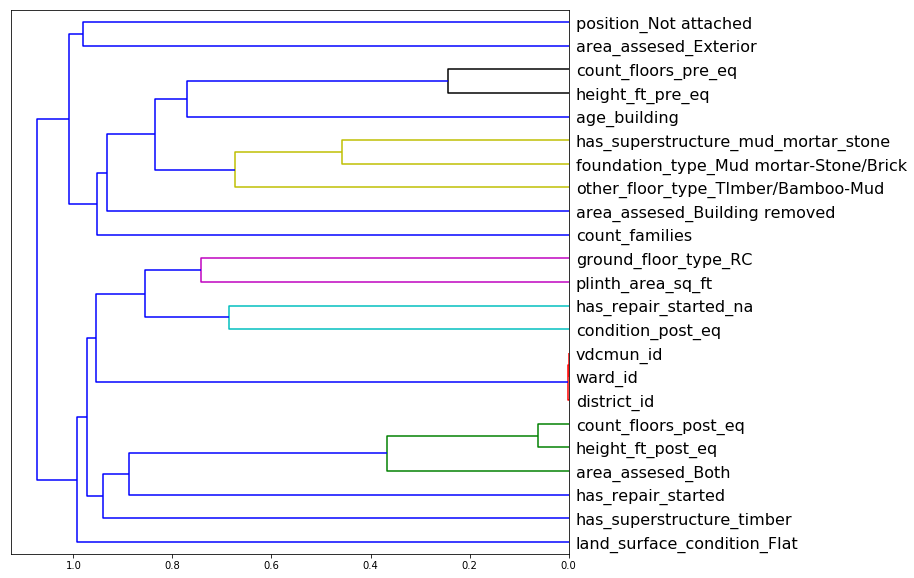

In [90]:
corr = np.round(scipy.stats.spearmanr(data_new).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=data_new.columns, orientation='left', leaf_font_size=16)
plt.show()

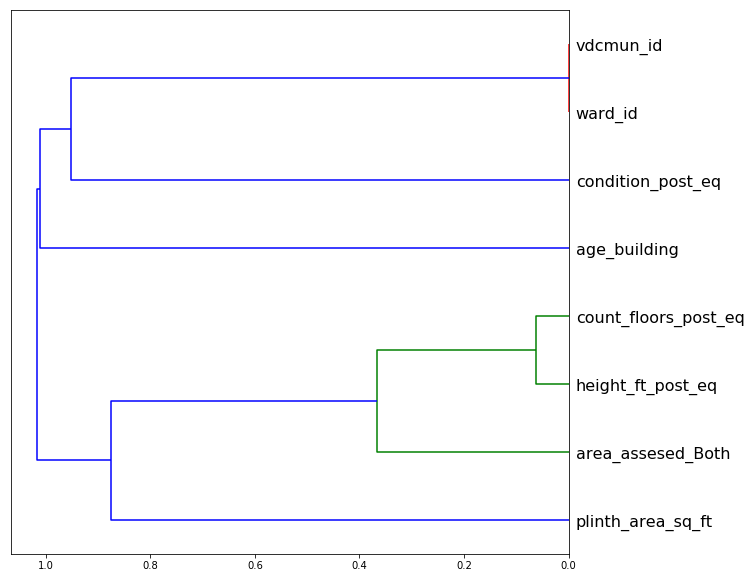

In [91]:
corr = np.round(scipy.stats.spearmanr(data_eight).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=data_eight.columns, orientation='left', leaf_font_size=16)
plt.show()

# TEST DATA

In [100]:
data_test = pd.read_csv('/home/spriyanshu723/hack/Dataset/final_test.csv')
data_test.head()

,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,...,area_assesed,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
1,1,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
2,2,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
3,3,a33a6eaa3a,7,701,70106,Private,1.0,0.0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
4,4,a33b073ff6,7,701,70107,Private,1.0,0.0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0


In [101]:
data_test.columns

Index(['Unnamed: 0', 'building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_supe

In [103]:
data_test = data_test.drop(['Unnamed: 0'], axis=1)
data_test = data_test.drop(['building_id'], axis=1)
data_test.head()

,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,...,area_assesed,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,7,701,70102,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
1,7,701,70103,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
2,7,701,70103,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
3,7,701,70106,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
4,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0


In [104]:
data_test.shape

(421175, 51)

In [105]:
from sklearn.utils import shuffle
data_test = shuffle(data_test)

In [106]:
??apply_cats

In [107]:
apply_cats(data_test, data_train)

In [110]:
data_test.shape

(421175, 51)

In [111]:
data_test['remove'] = -1

In [112]:
data_test.shape

(421175, 52)

In [113]:
data_test.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'ha

In [114]:
data_test.head()

,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,...,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,remove
397351,36,3616,361609,Private,1.0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,-1
345558,30,3037,303702,Private,1.0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,NaN,-1
155142,20,2046,204605,Public,1.0,0.0,0,0,0,0,...,1.0,0,0,0,1,0,0,0,1.0,-1
143310,20,2025,202506,Private,1.0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,NaN,-1
420651,36,3667,366702,Private,1.0,0.0,0,0,0,0,...,1.0,0,0,0,1,0,0,0,1.0,-1


In [115]:
df_test, y_test, nas_test = proc_df(data_test, 'remove', max_n_cat=7)

In [116]:
df_test.shape

(421175, 85)

In [117]:
y_test

array([-1, -1, -1, ..., -1, -1, -1])

In [118]:
nas_test

{'has_repair_started': 0.0}

In [120]:
df_test.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_families',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'plan_configuration',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',

In [121]:
keep

20       height_ft_post_eq
33       condition_post_eq
16    count_floors_post_eq
2                  ward_id
18       plinth_area_sq_ft
17            age_building
1                vdcmun_id
80       area_assesed_Both
Name: cols, dtype: object

In [123]:
data_etest = df_test[keep].copy()
data_etest.head()

,height_ft_post_eq,condition_post_eq,count_floors_post_eq,ward_id,plinth_area_sq_ft,age_building,vdcmun_id,area_assesed_Both
397351,20,3,2,361609,250,25,3616,1
345558,20,8,2,303702,660,18,3037,1
155142,16,3,2,204605,884,7,2046,1
143310,12,8,1,202506,800,1,2025,1
420651,0,5,0,366702,494,8,3667,0


In [124]:
data_etest.shape

(421175, 8)

In [125]:
bc

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [137]:
out = bc.predict(data_etest)

In [138]:
c = np.round(out)

In [139]:
y_test = c.astype(int)

In [140]:
y_test

array([3, 0, 1, ..., 3, 4, 2])

In [141]:
out

array([2.67, 0.  , 1.38, ..., 2.95, 4.  , 2.47])

In [142]:
Y_test = out.astype(int)

In [143]:
Y_test

array([2, 0, 1, ..., 2, 4, 2])